<h1><center>KIDNEY</center></h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV 

In [2]:
kidney_df=pd.read_csv("kidney.csv")

In [3]:
kidney_df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
kidney_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [5]:
kidney_df.shape

(400, 26)

In [6]:
kidney_df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [8]:
kidney_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,400.0,199.500000,115.614301,0.000,99.75,199.50,299.25,399.000
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
bp,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
sg,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
al,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
su,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
bgr,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
bu,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
sc,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sod,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000


In [10]:
kidney_df.isnull().sum().sort_values(ascending=False)

rbc               152
rc                130
wc                105
pot                88
sod                87
pcv                70
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
ane                 1
appet               1
pe                  1
id                  0
classification      0
dtype: int64

In [11]:
cols_names={"bp":"blood_pressure",
          "sg":"specific_gravity",
          "al":"albumin",
          "su":"sugar",
          "rbc":"red_blood_cells",
          "pc":"pus_cell",
          "pcc":"pus_cell_clumps",
          "ba":"bacteria",
          "bgr":"blood_glucose_random",
          "bu":"blood_urea",
          "sc":"serum_creatinine",
          "sod":"sodium",
          "pot":"potassium",
          "hemo":"haemoglobin",
          "pcv":"packed_cell_volume",
          "wc":"white_blood_cell_count",
          "rc":"red_blood_cell_count",
          "htn":"hypertension",
          "dm":"diabetes_mellitus",
          "cad":"coronary_artery_disease",
          "appet":"appetite",
          "pe":"pedal_edema",
          "ane":"anemia"}

kidney_df.rename(columns=cols_names, inplace=True)

In [14]:
numerical_features = []
categorical_features = []

for i in kidney_df.columns:
    if kidney_df[i].nunique()>7:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

In [16]:
for feats in categorical_features:
    print(f'{feats} has {kidney_df[feats].unique()} categories.\n')

specific_gravity has [1.02  1.01  1.005 1.015   nan 1.025] categories.

albumin has [ 1.  4.  2.  3.  0. nan  5.] categories.

sugar has [ 0.  3.  4.  1. nan  2.  5.] categories.

red_blood_cells has [nan 'normal' 'abnormal'] categories.

pus_cell has ['normal' 'abnormal' nan] categories.

pus_cell_clumps has ['notpresent' 'present' nan] categories.

bacteria has ['notpresent' 'present' nan] categories.

hypertension has ['yes' 'no' nan] categories.

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] categories.

coronary_artery_disease has ['no' 'yes' '\tno' nan] categories.

appetite has ['good' 'poor' nan] categories.

pedal_edema has ['no' 'yes' nan] categories.

anemia has ['no' 'yes' nan] categories.

classification has ['ckd' 'ckd\t' 'notckd'] categories.



In [19]:
kidney_df['diabetes_mellitus'] = kidney_df['diabetes_mellitus'].replace(to_replace = {'no':'no','yes':'yes',' yes':'yes'})
kidney_df['coronary_artery_disease'] = kidney_df['coronary_artery_disease'].replace(to_replace = 'no', value='no')
kidney_df['classification'] = kidney_df['classification'].replace(to_replace = 'ckd', value = 'ckd')

In [20]:
for feats in categorical_features:
    print(f'{feats} has {kidney_df[feats].unique()} categories.\n')

specific_gravity has [1.02  1.01  1.005 1.015   nan 1.025] categories.

albumin has [ 1.  4.  2.  3.  0. nan  5.] categories.

sugar has [ 0.  3.  4.  1. nan  2.  5.] categories.

red_blood_cells has [nan 'normal' 'abnormal'] categories.

pus_cell has ['normal' 'abnormal' nan] categories.

pus_cell_clumps has ['notpresent' 'present' nan] categories.

bacteria has ['notpresent' 'present' nan] categories.

hypertension has ['yes' 'no' nan] categories.

diabetes_mellitus has ['yes' 'no' '\tno' '\tyes' nan] categories.

coronary_artery_disease has ['no' 'yes' '\tno' nan] categories.

appetite has ['good' 'poor' nan] categories.

pedal_edema has ['no' 'yes' nan] categories.

anemia has ['no' 'yes' nan] categories.

classification has ['ckd' 'ckd\t' 'notckd'] categories.



ValueError: could not convert string to float: '\t?'

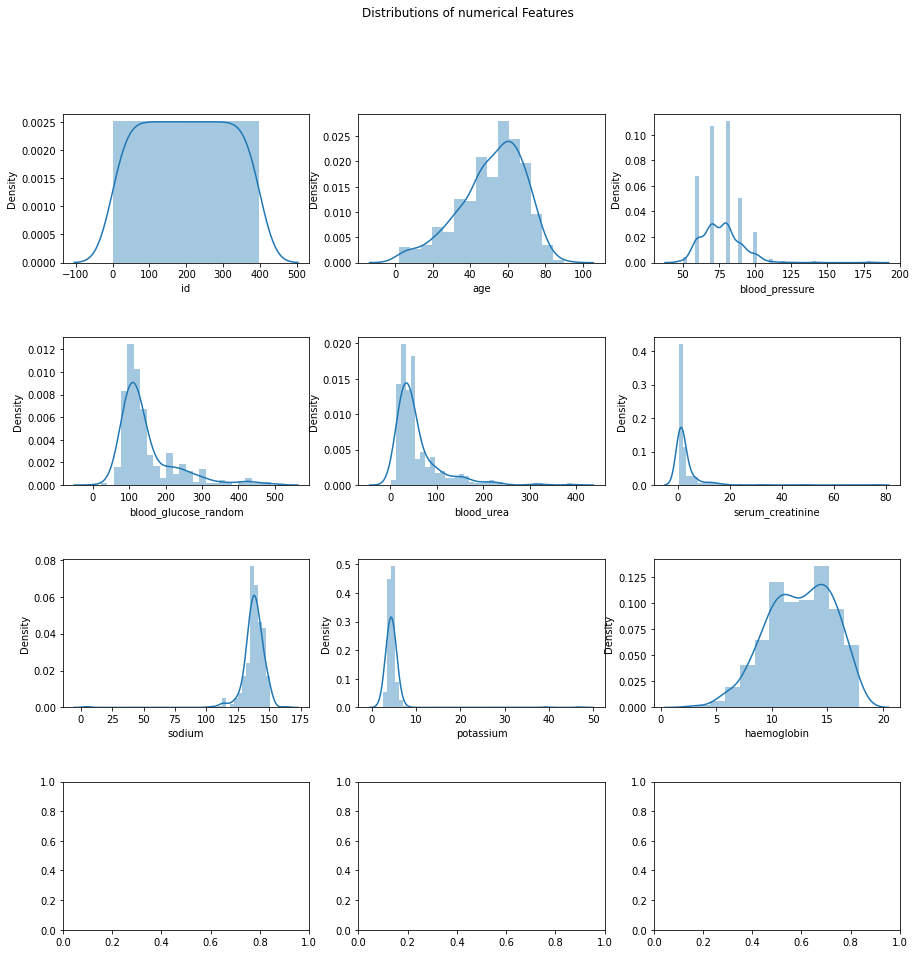

In [23]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15,15))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of numerical Features')


for ax, feats in zip(axes.flatten(), numerical_features):
    sns.distplot(kidney_df[feats], ax=ax)

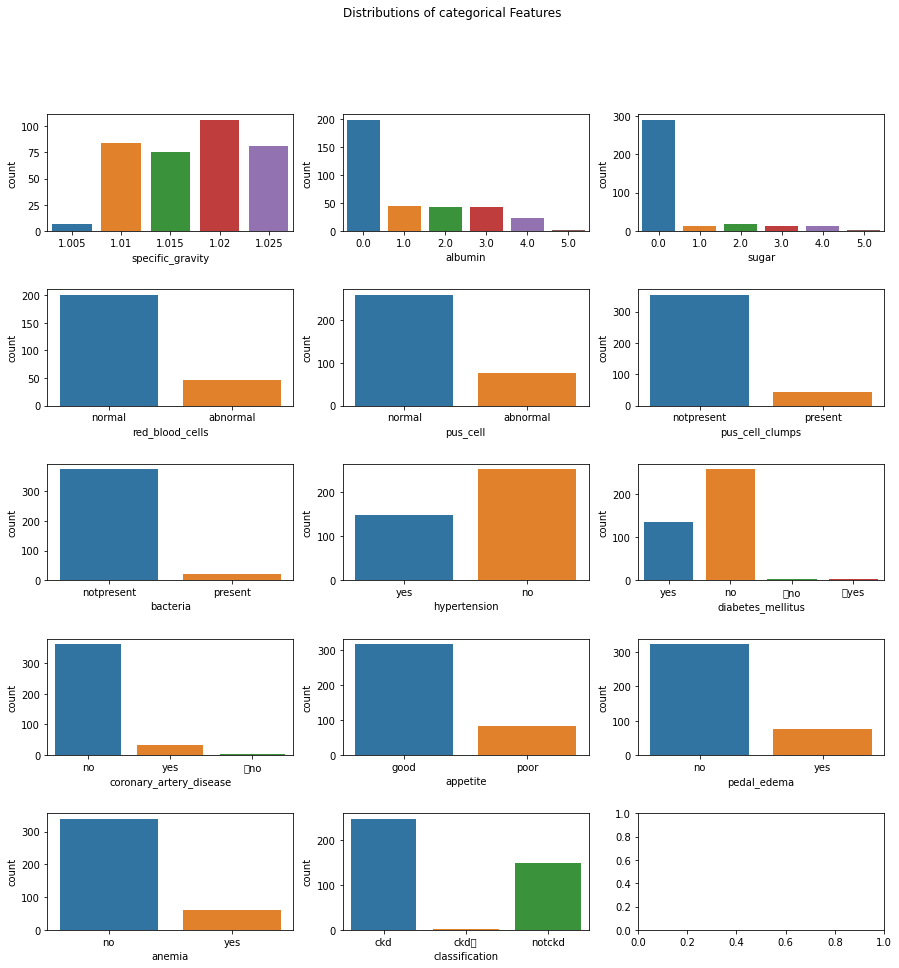

In [24]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15,15))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of categorical Features')


for ax, feats in zip(axes.flatten(), categorical_features):
    sns.countplot(kidney_df[feats], ax=ax)

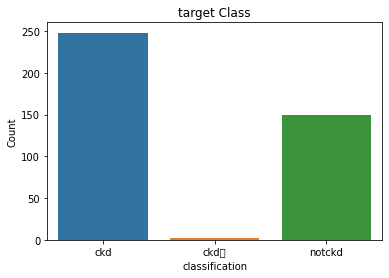

Percent of chronic kidney disease sample:  62.0 %
Percent of not a chronic kidney disease sample:  37.5 %


In [25]:
sns.countplot(x='classification',data=kidney_df)
plt.xlabel("classification")
plt.ylabel("Count")
plt.title("target Class")
plt.show()
print('Percent of chronic kidney disease sample: ',round(len(kidney_df[kidney_df['classification']=='ckd'])/len(kidney_df['classification'])*100,2),"%")
print('Percent of not a chronic kidney disease sample: ',round(len(kidney_df[kidney_df['classification']=='notckd'])/len(kidney_df['classification'])*100,2),"%")

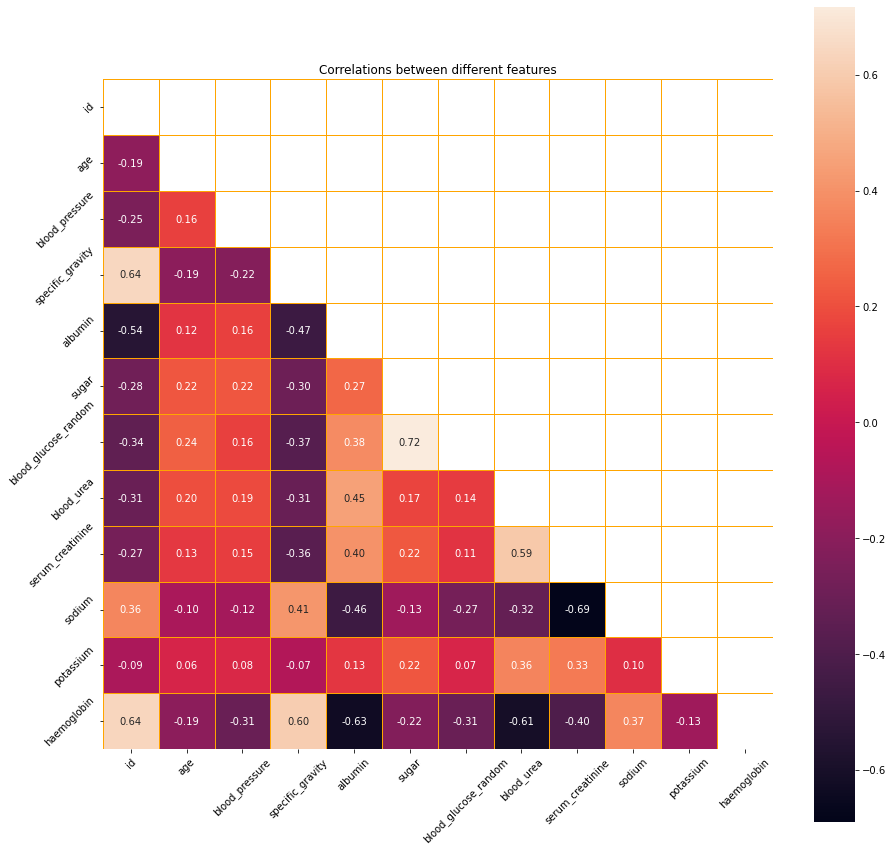

In [27]:
corr_df = kidney_df.corr()
f,ax=plt.subplots(figsize=(15,15))
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_df,annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange", mask = mask, square=True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Correlations between different features')
plt.show()

In [28]:
df=pd.read_csv('kidney.csv')

In [29]:
df[['htn','dm','cad','pe','ane']] = df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
df[['pcc','ba']] = df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
df[['appet']] = df[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
df['classification'] = df['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
df.rename(columns={'classification':'class'},inplace=True)
df['pe'] = df['pe'].replace(to_replace='good',value=0)
df['appet'] = df['appet'].replace(to_replace='no',value=0)
df['cad'] = df['cad'].replace(to_replace='\tno',value=0)
df['dm'] = df['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})

df.drop('id',axis=1,inplace=True)
df = df.dropna(axis=0)

cols = ['bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc']
X = df[cols]
y = df['class']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(105, 7)
(105,)
(53, 7)
(53,)


In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
    
def evaluating_model(A,y_test, y_pred):
    print(A," Accuracy Score:- ", accuracy_score(y_test, y_pred)) 
    print(A," Precision Score:- ", precision_score(y_test, y_pred)) 
    print(A," Recall Score:- ", recall_score(y_test, y_pred)) 
    print(A," Confusion Matrix:- \n", confusion_matrix(y_test, y_pred))
    print(A,'Classification Report: \n', classification_report(y_test,y_pred))

# Model Selection

In [35]:
### 1. Logistic Regression
LR=LogisticRegression()
LR.fit(X_train, y_train)
y_predLR=LR.predict(X_test)
evaluating_model("Logistic Regrestion",y_test,y_predLR)
LR_TRAIN_SCORE = round(LR.score(X_train, y_train) * 100, 2)
LR_TEST_SCORE = round(LR.score(X_test, y_test) * 100, 2)
print(LR_TRAIN_SCORE)
print(LR_TEST_SCORE)

Logistic Regrestion  Accuracy Score:-  0.9811320754716981
Logistic Regrestion  Precision Score:-  1.0
Logistic Regrestion  Recall Score:-  0.9285714285714286
Logistic Regrestion  Confusion Matrix:- 
 [[39  0]
 [ 1 13]]
Logistic Regrestion Classification Report: 
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.99        39
         1.0       1.00      0.93      0.96        14

    accuracy                           0.98        53
   macro avg       0.99      0.96      0.98        53
weighted avg       0.98      0.98      0.98        53

98.1
98.11


In [36]:
### 2. Gaussian Naive Bayes
GNB=GaussianNB()
GNB.fit(X_train,y_train)
y_predGNB=GNB.predict(X_test)
evaluating_model("Gaussian Naive Bayes",y_test,y_predGNB)
GNB_TRAIN_SCORE = round(GNB.score(X_train, y_train) * 100, 2)
GNB_TEST_SCORE = round(GNB.score(X_test, y_test) * 100, 2)
print(GNB_TRAIN_SCORE)
print(GNB_TEST_SCORE)

Gaussian Naive Bayes  Accuracy Score:-  1.0
Gaussian Naive Bayes  Precision Score:-  1.0
Gaussian Naive Bayes  Recall Score:-  1.0
Gaussian Naive Bayes  Confusion Matrix:- 
 [[39  0]
 [ 0 14]]
Gaussian Naive Bayes Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        39
         1.0       1.00      1.00      1.00        14

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53

99.05
100.0


In [37]:
### 3. Random Forest
RFC=RandomForestClassifier(n_estimators=100)
RFC.fit(X_train,y_train)
y_predRFC=RFC.predict(X_test)
evaluating_model("Random Forest",y_test,y_predRFC)
RFC_TRAIN_SCORE = round(RFC.score(X_train, y_train) * 100, 2)
RFC_TEST_SCORE = round(RFC.score(X_test, y_test) * 100, 2)
print(RFC_TRAIN_SCORE)
print(RFC_TEST_SCORE)

Random Forest  Accuracy Score:-  1.0
Random Forest  Precision Score:-  1.0
Random Forest  Recall Score:-  1.0
Random Forest  Confusion Matrix:- 
 [[39  0]
 [ 0 14]]
Random Forest Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        39
         1.0       1.00      1.00      1.00        14

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53

100.0
100.0


In [38]:
## 4.Support Vector Machine
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV 

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose =3) 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.762 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.762 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.762 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.714 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [39]:
grid.best_estimator_

SVC(C=1, gamma=1)

In [42]:
svc=SVC(C=1, gamma=1)
svc.fit(X_train,y_train)
y_predSVC=svc.predict(X_test)
evaluating_model("Support VVector Machine",y_test,y_predSVC)
SVC_TRAIN_SCORE = round(svc.score(X_train, y_train) * 100, 2)
SVC_TEST_SCORE = round(svc.score(X_test, y_test) * 100, 2)
print(SVC_TRAIN_SCORE)
print(SVC_TEST_SCORE)

Support VVector Machine  Accuracy Score:-  1.0
Support VVector Machine  Precision Score:-  1.0
Support VVector Machine  Recall Score:-  1.0
Support VVector Machine  Confusion Matrix:- 
 [[39  0]
 [ 0 14]]
Support VVector Machine Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        39
         1.0       1.00      1.00      1.00        14

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53

99.05
100.0


In [43]:
## 5.Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV 

def randomized_search(params, runs=20, clf=DecisionTreeClassifier(random_state=2)): 
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2) 
    rand_clf.fit(X_train, y_train) 
    best_model = rand_clf.best_estimator_
    best_score = rand_clf.best_score_

    print("Training score: {:.3f}".format(best_score))
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Test score: {:.3f}'.format(accuracy))
    
    return best_model

randomized_search(params={'criterion':['entropy', 'gini'],
                              'splitter':['random', 'best'],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01],
                          'min_samples_split':[2, 3, 4, 5, 6, 8, 10],
                          'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04],
                          'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
                          'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
                          'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
                          'max_depth':[None, 2,4,6,8],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]
                         })

Training score: 0.990
Test score: 0.981


DecisionTreeClassifier(max_depth=6, max_features='auto', max_leaf_nodes=45,
                       min_impurity_decrease=0.1, min_samples_split=3,
                       min_weight_fraction_leaf=0.01, random_state=2,
                       splitter='random')

In [44]:
DTC=DecisionTreeClassifier(max_depth=6, max_features='auto', max_leaf_nodes=45,
                       min_impurity_decrease=0.1, min_samples_split=3,
                       min_weight_fraction_leaf=0.01, random_state=2,
                       splitter='random')
DTC.fit(X_train,y_train)
y_predDTC=DTC.predict(X_test)
evaluating_model("DecisionTreeClassifier",y_test,y_predDTC)
DTC_TRAIN_SCORE = round(DTC.score(X_train, y_train) * 100, 2)
DTC_TEST_SCORE = round(DTC.score(X_test, y_test) * 100, 2)
print(DTC_TRAIN_SCORE)
print(DTC_TEST_SCORE)

DecisionTreeClassifier  Accuracy Score:-  0.9811320754716981
DecisionTreeClassifier  Precision Score:-  1.0
DecisionTreeClassifier  Recall Score:-  0.9285714285714286
DecisionTreeClassifier  Confusion Matrix:- 
 [[39  0]
 [ 1 13]]
DecisionTreeClassifier Classification Report: 
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.99        39
         1.0       1.00      0.93      0.96        14

    accuracy                           0.98        53
   macro avg       0.99      0.96      0.98        53
weighted avg       0.98      0.98      0.98        53

99.05
98.11


In [45]:
###XGboostt
from xgboost import XGBClassifier
xgb1 = XGBClassifier(colsample_bytree= 1.0,
 learning_rate = 0.1,
 max_depth = 4,
 n_estimators= 400,
 subsample= 1.0)  

eval_set  = [(X_test, y_test)]

xgb1.fit(X_train, y_train,early_stopping_rounds=10, eval_metric="logloss",eval_set=eval_set, verbose=True)

[0]	validation_0-logloss:0.60606
[1]	validation_0-logloss:0.53367
[2]	validation_0-logloss:0.47261
[3]	validation_0-logloss:0.42052
[4]	validation_0-logloss:0.37570
[5]	validation_0-logloss:0.33683
[6]	validation_0-logloss:0.30293
[7]	validation_0-logloss:0.27321
[8]	validation_0-logloss:0.24704
[9]	validation_0-logloss:0.22392
[10]	validation_0-logloss:0.20343
[11]	validation_0-logloss:0.18521
[12]	validation_0-logloss:0.16897
[13]	validation_0-logloss:0.15564
[14]	validation_0-logloss:0.14252
[15]	validation_0-logloss:0.13188
[16]	validation_0-logloss:0.12120
[17]	validation_0-logloss:0.11266
[18]	validation_0-logloss:0.10390
[19]	validation_0-logloss:0.09701
[20]	validation_0-logloss:0.08978
[21]	validation_0-logloss:0.08420
[22]	validation_0-logloss:0.07926
[23]	validation_0-logloss:0.07370
[24]	validation_0-logloss:0.06968
[25]	validation_0-logloss:0.06501
[26]	validation_0-logloss:0.06172
[27]	validation_0-logloss:0.05777
[28]	validation_0-logloss:0.05507
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1.0, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [46]:
y_predXGB1=xgb1.predict(X_test)
evaluating_model("XGBOOST",y_test,y_predXGB1)
XGB1_TRAIN_SCORE = round(xgb1.score(X_train, y_train) * 100, 2)
XGB1_TEST_SCORE = round(xgb1.score(X_test, y_test) * 100, 2)
print(XGB1_TRAIN_SCORE)
print(XGB1_TEST_SCORE)

XGBOOST  Accuracy Score:-  1.0
XGBOOST  Precision Score:-  1.0
XGBOOST  Recall Score:-  1.0
XGBOOST  Confusion Matrix:- 
 [[39  0]
 [ 0 14]]
XGBOOST Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        39
         1.0       1.00      1.00      1.00        14

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53

99.05
100.0


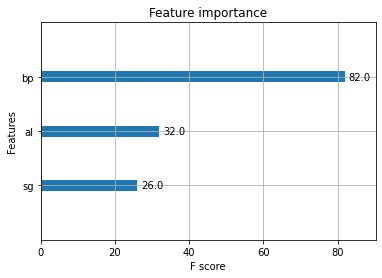

In [47]:
from xgboost import plot_importance
plot_importance(xgb1)
plt.show()

In [50]:
####GBDT
from sklearn.ensemble import GradientBoostingClassifier

GBDT = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1,max_depth=1,random_state=0) 
GBDT.fit(X_train, y_train) 

y_predGBDT = GBDT.predict(X_test) 
evaluating_model("GradientBoostingClassifier",y_test, y_predGBDT)
GBDT_TRAIN_SCORE = round(GBDT.score(X_train, y_train) * 100, 2)
GBDT_TEST_SCORE = round(GBDT.score(X_test, y_test) * 100, 2)
print(GBDT_TRAIN_SCORE)
print(GBDT_TEST_SCORE)

GradientBoostingClassifier  Accuracy Score:-  1.0
GradientBoostingClassifier  Precision Score:-  1.0
GradientBoostingClassifier  Recall Score:-  1.0
GradientBoostingClassifier  Confusion Matrix:- 
 [[39  0]
 [ 0 14]]
GradientBoostingClassifier Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        39
         1.0       1.00      1.00      1.00        14

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53

100.0
100.0


In [51]:
# Comparing all the models
models = pd.DataFrame({
    'Model': [ "Logistic Regrestion", 'Gaussian Naive Bayes','Random Forest',"Support Vector Machine","DecisionTreeClassifier","XGBOOST","GradientBoostingClassifier"],
    'Score': [ LR_TRAIN_SCORE, GNB_TRAIN_SCORE, RFC_TRAIN_SCORE,SVC_TRAIN_SCORE,DTC_TRAIN_SCORE,XGB1_TRAIN_SCORE,GBDT_TRAIN_SCORE],
    'Test Score': [ LR_TEST_SCORE, GNB_TEST_SCORE, RFC_TEST_SCORE,SVC_TEST_SCORE,DTC_TEST_SCORE,XGB1_TEST_SCORE,GBDT_TEST_SCORE]})
models.sort_values(by='Test Score', ascending=False)

,Model,Score,Test Score
1,Gaussian Naive Bayes,99.05,100.00
2,Random Forest,100.00,100.00
3,Support Vector Machine,99.05,100.00
5,XGBOOST,99.05,100.00
6,GradientBoostingClassifier,100.00,100.00
0,Logistic Regrestion,98.10,98.11
4,DecisionTreeClassifier,99.05,98.11


## Conclusion


### From the Models (Logistic Regression, Gaussian Naive Bayes, Random Forest,GBDT,Decisio Tree,XGboost,SVM)  Random Forest performs the best on this dataset

In [52]:
import joblib 
joblib.dump(RFC, 'HeartRFC.pkl') 
model = joblib.load('HeartRFC.pkl' ) 

In [90]:
model.predict([[90.0,1.010,4.0,0.0,0.0,1.0,1.0],
              [60,1.02,0,0,0,0,0]])

array([1., 0.])